In [2]:
%matplotlib inline
import pandas as pd
#import pandas_datareader 用于直接获取雅虎财经上面的股票数据
import datetime
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib.pylab import style
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

style.use('ggplot')    
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False  

C:\Users\LOMO\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
stockFile = 'data/T10yr.csv'
stock = pd.read_csv(stockFile, index_col=0, parse_dates=[0])
stock.head(10)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,6.498,6.603,6.498,6.548,0,6.548
2000-01-04,6.530,6.548,6.485,6.485,0,6.485
2000-01-05,6.521,6.599,6.508,6.599,0,6.599
2000-01-06,6.558,6.585,6.540,6.549,0,6.549
2000-01-07,6.545,6.595,6.504,6.504,0,6.504
2000-01-10,6.540,6.567,6.536,6.558,0,6.558
2000-01-11,6.600,6.664,6.595,6.664,0,6.664
2000-01-12,6.659,6.696,6.645,6.696,0,6.696
2000-01-13,6.664,6.705,6.618,6.618,0,6.618


In [5]:
stock_week = stock['Close'].resample('W-MON').mean() # 'W-MON'指的是以周为单位进行重采样，并且以每周的星期一
stock_train = stock_week['2000':'2015']

In [8]:
pd.set_option('max_rows',15)
stock_week

Date
2000-01-03    6.54800
2000-01-10    6.53900
2000-01-17    6.66300
2000-01-24    6.73720
2000-01-31    6.67280
2000-02-07    6.56760
2000-02-14    6.61680
               ...   
2016-06-20    1.61180
2016-06-27    1.63200
2016-07-04    1.47050
2016-07-11    1.38780
2016-07-18    1.53860
2016-07-25    1.56880
2016-08-01    1.51175
Freq: W-MON, Name: Close, Length: 866, dtype: float64

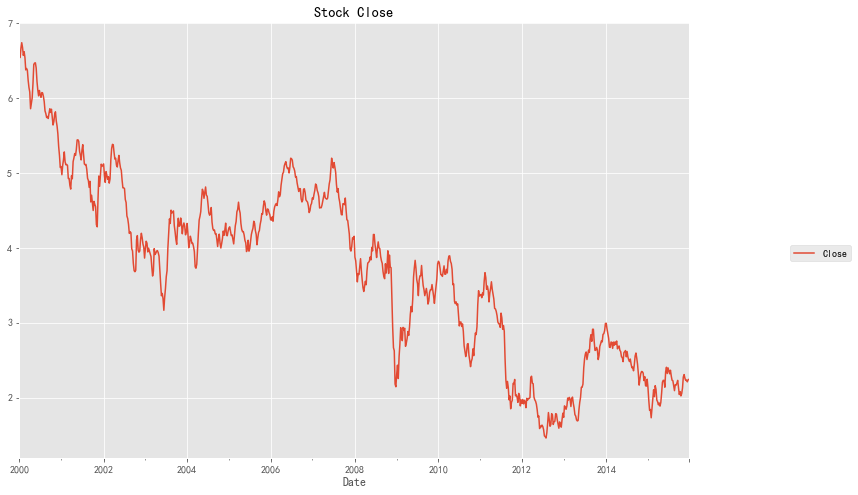

In [12]:
stock_train.plot(figsize=(12,8))
plt.legend(bbox_to_anchor=(1.25, 0.5))
plt.title("Stock Close")
sns.despine() #plt.show()

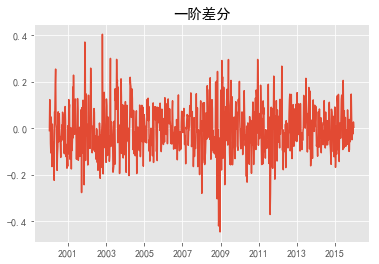

In [10]:
stock_diff = stock_train.diff()
stock_diff = stock_diff.dropna()

plt.figure()
plt.plot(stock_diff)
plt.title('一阶差分')
plt.show()

C:\Users\LOMO\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


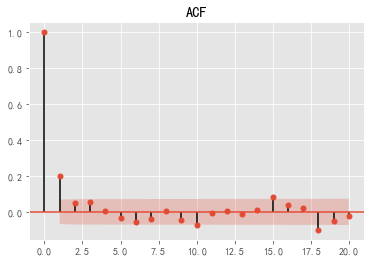

In [13]:
acf = plot_acf(stock_diff, lags=20)
plt.title("ACF")
acf.show()

C:\Users\LOMO\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


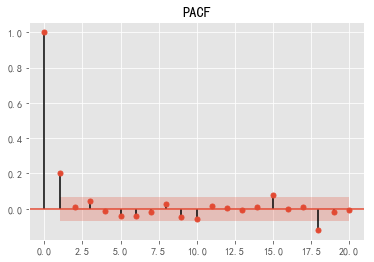

In [14]:
pacf = plot_pacf(stock_diff, lags=20)
plt.title("PACF")
pacf.show()

In [15]:
model = ARIMA(stock_train, order=(1, 1, 1),freq='W-MON') #也是以周为单位

In [16]:
result = model.fit()
#print(result.summary())

In [17]:
pred = result.predict('20140609', '20160701',dynamic=True, typ='levels') #指定起始时间（起始时间必须要包含在训练数据中）和终止时间
print (pred)

2014-06-09    2.463559
2014-06-16    2.455539
2014-06-23    2.449569
2014-06-30    2.444183
2014-07-07    2.438962
2014-07-14    2.433788
2014-07-21    2.428627
                ...   
2016-05-16    1.938871
2016-05-23    1.933716
2016-05-30    1.928560
2016-06-06    1.923405
2016-06-13    1.918250
2016-06-20    1.913094
2016-06-27    1.907939
Freq: W-MON, Length: 108, dtype: float64


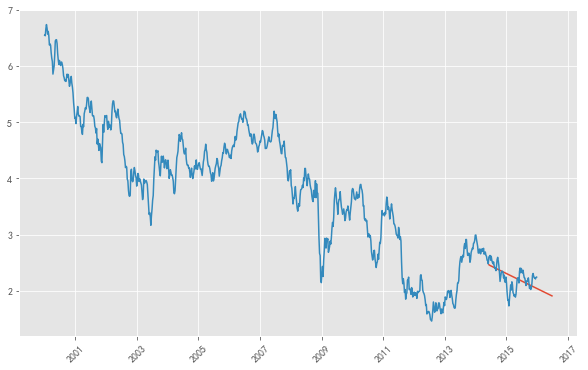

In [20]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)
plt.plot(pred)
plt.plot(stock_train)